# Subtask 1: Explorattory Data Analysis

### Import packages and Datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
client_df=pd.read_csv('client_data.csv')
price_df=pd.read_csv('price_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Descriptive statistics of data

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
#We need to convert the datetime related columns into datetime data types later

### Lets look at some clients and price statistics for now

In [8]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [140]:
client_df.skew(numeric_only=True)

cons_12m                           5.997308
cons_gas_12m                       9.597530
cons_last_month                    6.391407
forecast_cons_12m                  7.155853
forecast_cons_year                16.587990
forecast_discount_energy           5.155098
forecast_meter_rent_12m            1.505148
forecast_price_energy_off_peak    -0.119586
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak       -4.998772
imp_cons                          13.198799
margin_gross_pow_ele               4.472632
margin_net_pow_ele                 4.473326
nb_prod_act                        8.636878
net_margin                        36.569515
num_years_antig                    1.446214
pow_max                            5.786785
churn                              2.720715
dtype: float64

#### This shows the distribution is highly skewed

In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


The average price of energy for the 1st period was: $0.14
The average price of energy for the 2nd period was: $0.05
The average price of energy for the 3rd period was: $0.03
The average price of energy was declining in the last year.

The average power of power for the 1st period was: $43.33
The average power of power for the 2nd period was: $10.62
The average power of power for the 3rd period was: $6.40
The average price of power was declining in the last year.

### Creating a new dataset to see the customer churn info

In [10]:
churn_df=client_df[['id','churn']]

In [11]:
churn_df.head(3)

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0


In [12]:
churn_df=churn_df.replace({0:'Stayed',1:'Churned'})

In [13]:
churn_df.head(3)

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,Churned
1,d29c2c54acc38ff3c0614d0a653813dd,Stayed
2,764c75f661154dac3a6c254cd082ea7d,Stayed


In [14]:
churn_df.to_csv('churn_data.csv')

### Checking what % of customers churned in the last 3 months

In [15]:
churn_df['churn'].value_counts()

Stayed     13187
Churned     1419
Name: churn, dtype: int64

### So 1419 customers churned in the last 3 months

In [16]:
churn_df['churn'].value_counts()/churn_df.shape[0]*100

Stayed     90.284814
Churned     9.715186
Name: churn, dtype: float64

In the past 3 months :
90% of customer retention, 
10% of customer churn

# Subtask 2:Data Visualization

### Visualizing the churning status

In [130]:
def plot_stacked_bars(dataframe, title_, size_=(15, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

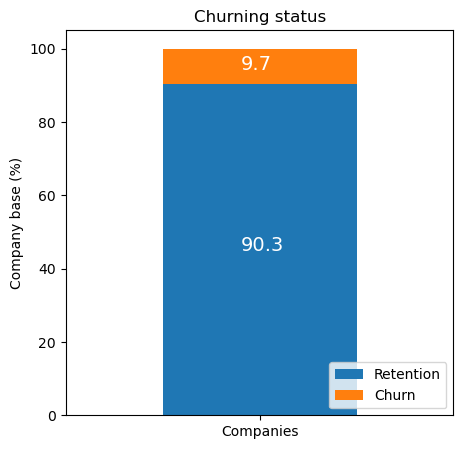

In [131]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

### About 10% of customers churned over the last 3 months, sounds about right from previous calculations

## Sales Channel and churning relationship

In [132]:
channel=client_df[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


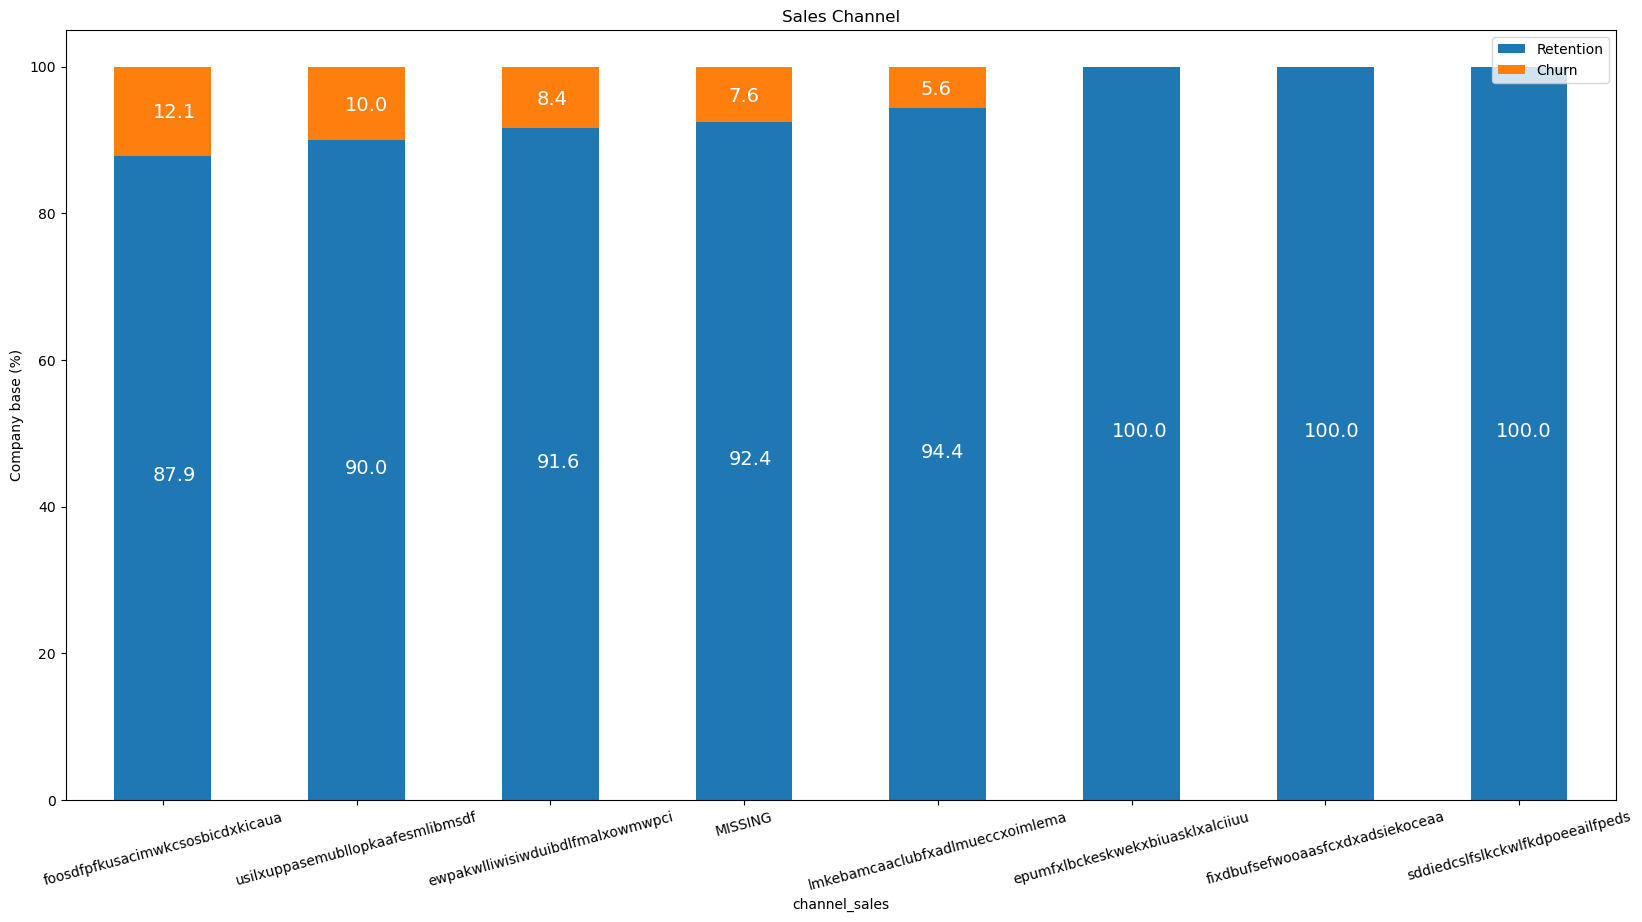

In [135]:
plot_stacked_bars(channel_churn,'Sales Channel',(20,10), rot_=15)

Interestingly, the churning customers are distributed over 5 different values of 'sales_channel', as well as the value of 'MISSING' has a churn rate of 7.6%
Missing indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Consumption

Lets check the consumption in the last year and month. Since the consumption data is univarient, lets use histogram to visualize their distribution

In [141]:
client_df.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0


In [145]:
consumption=client_df[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]
consumption.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.0,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.0,f,0


In [146]:
def plot_distribution(dataframe,column,ax,bins_=50):
    temp=pd.DataFrame({'Retention':dataframe[dataframe['churn']==0][column],
                      'Churn':dataframe[dataframe['churn']==1][column]})
    temp[['Retention','Churn']].plot(kind='hist',bins=bins_,ax=ax,stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

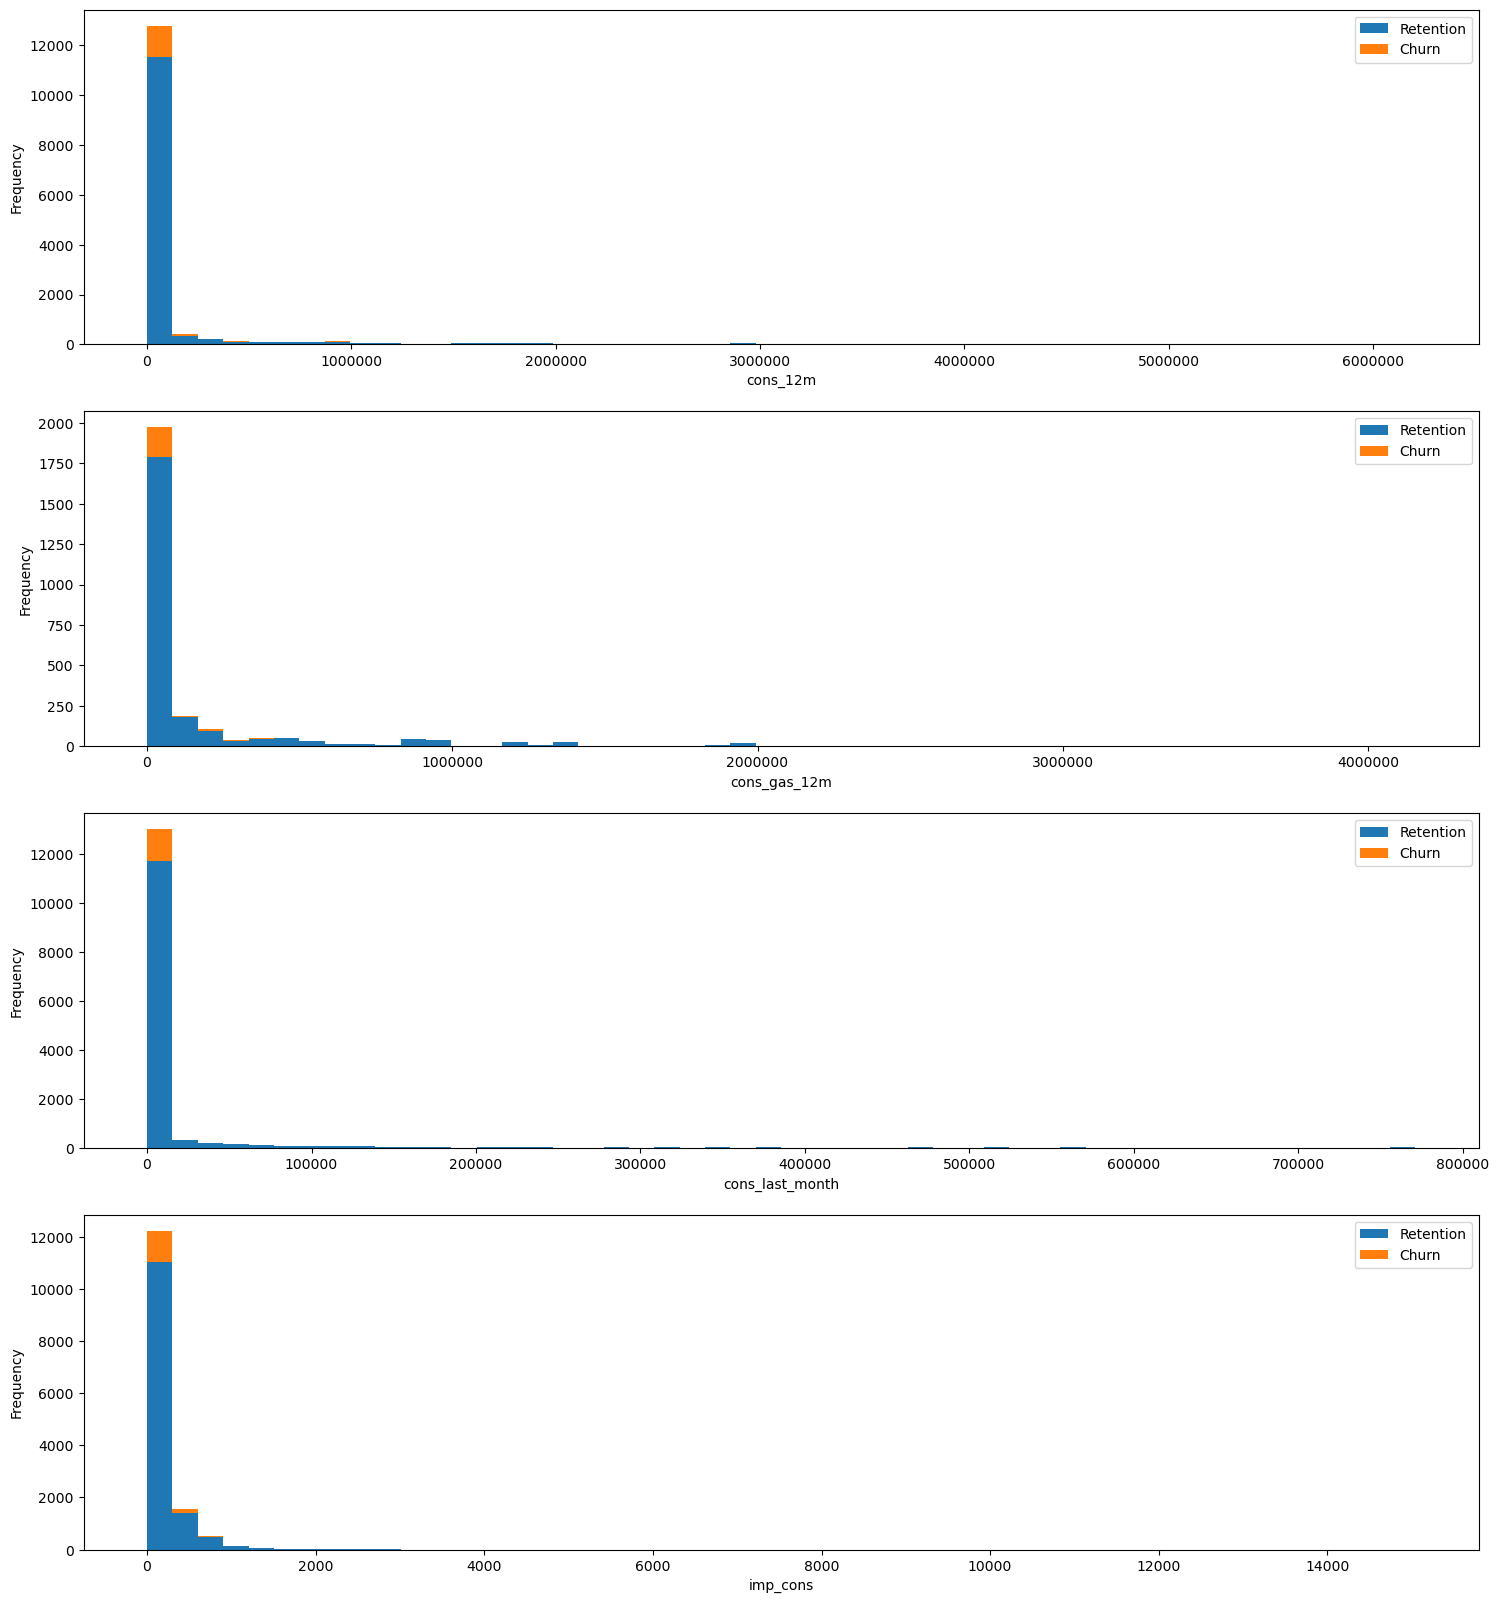

In [150]:
fig, axs=plt.subplots(nrows=4, figsize=(18,20))
plot_distribution(consumption,'cons_12m',axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'],'cons_gas_12m',axs[1])
plot_distribution(consumption,'cons_last_month',axs[2])
plot_distribution(consumption,'imp_cons',axs[3])

### Looks like there's some possible outliers, Lets visualize the outliers

C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\si

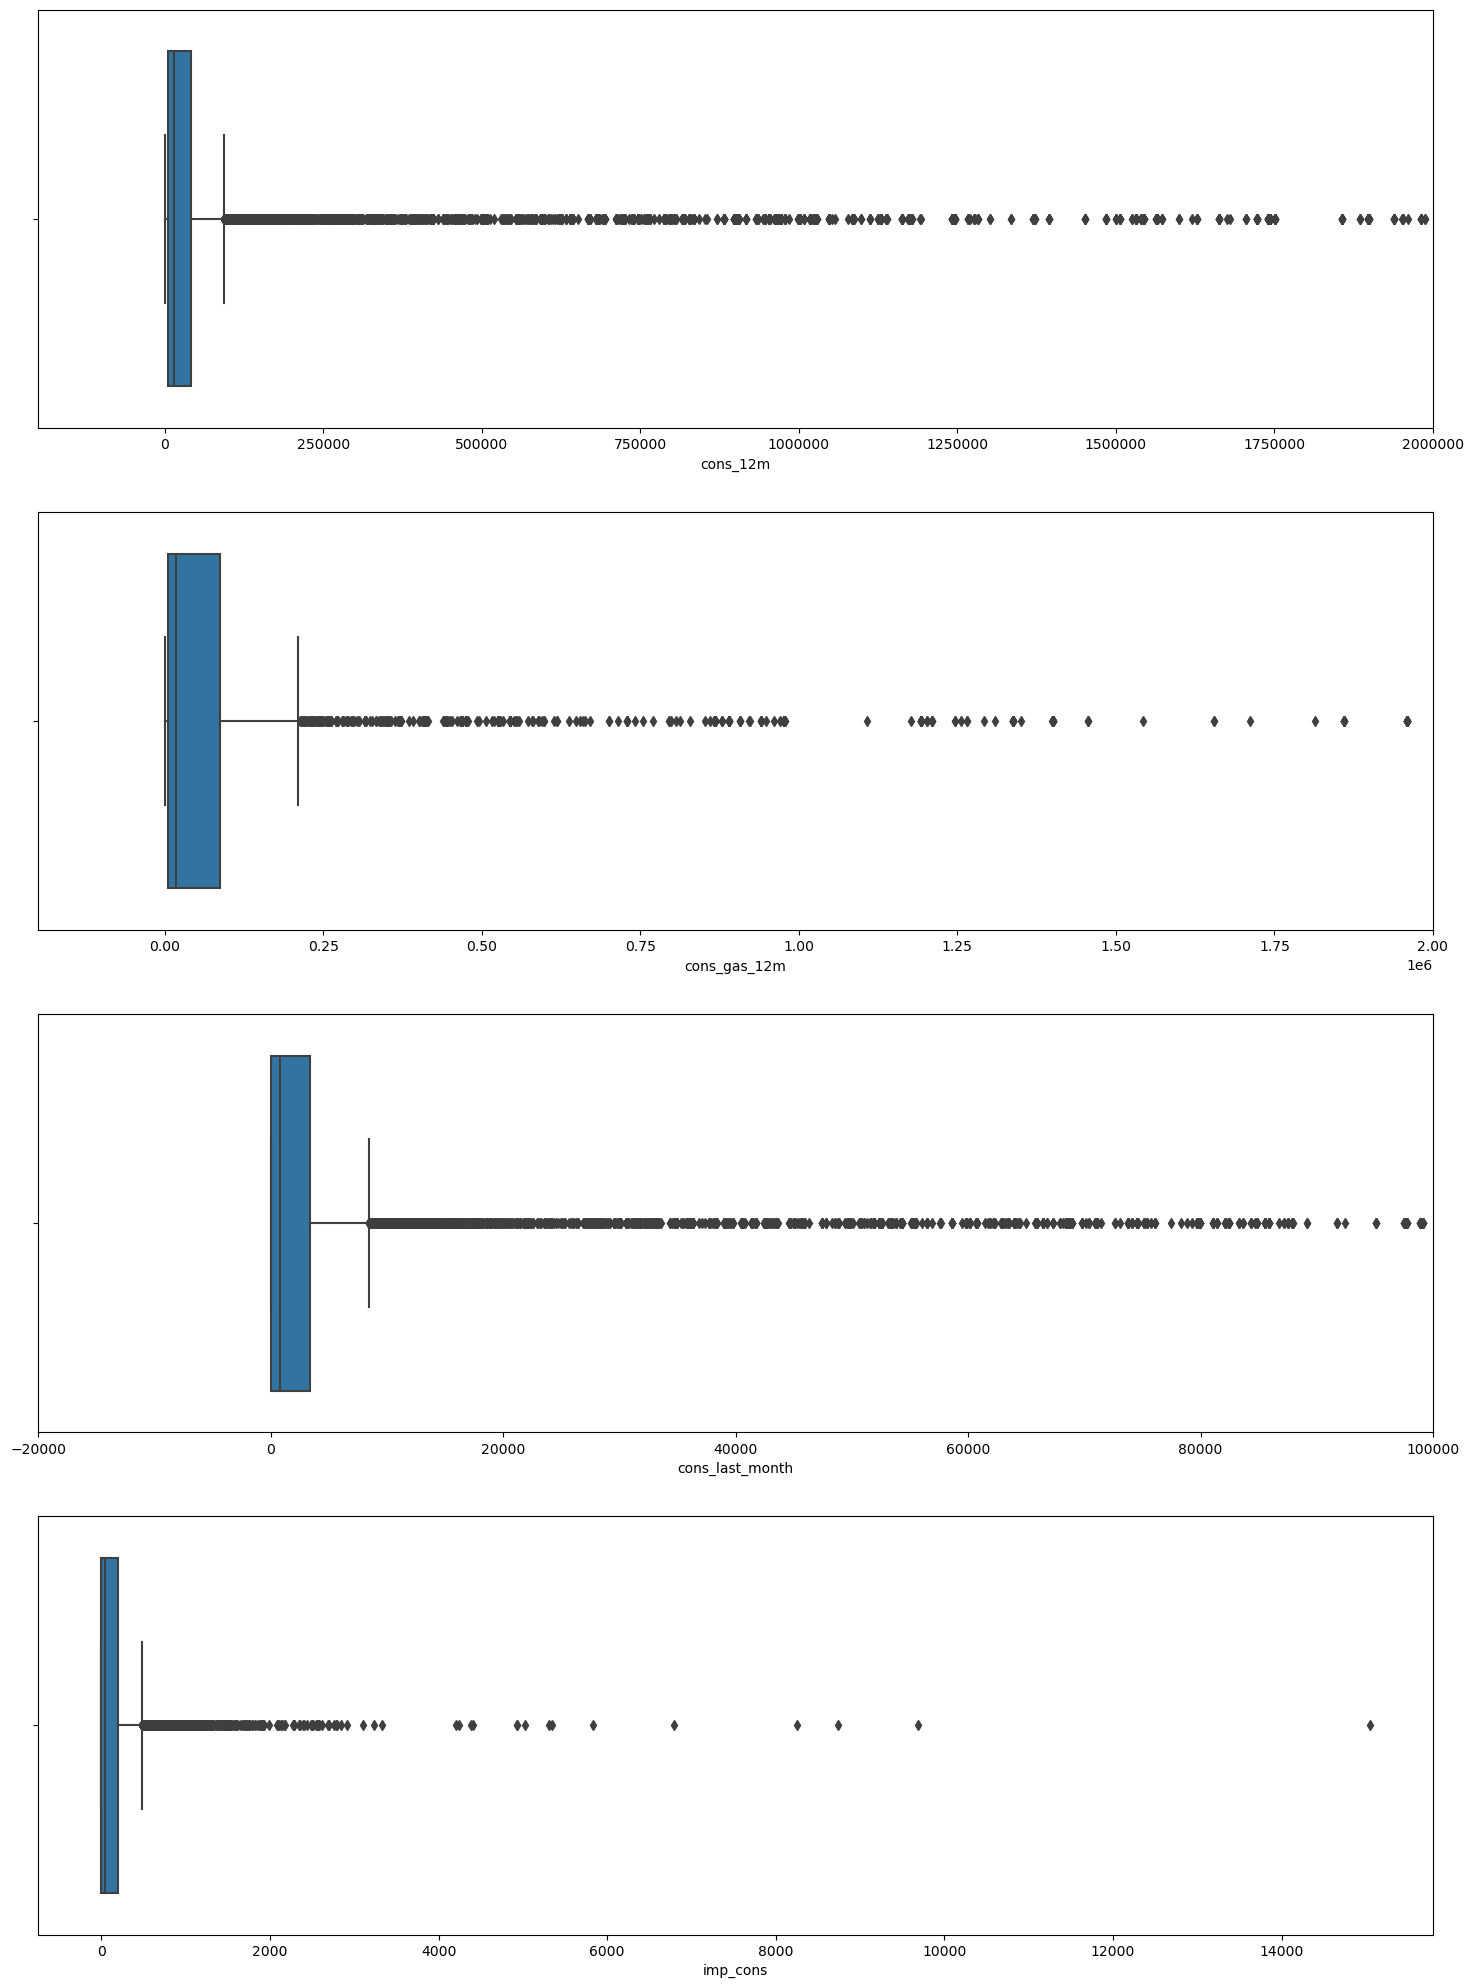

In [177]:
fig, axs=plt.subplots(nrows=4, figsize=(18,25))

sns.boxplot(consumption['cons_12m'], ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'], ax=axs[1])
sns.boxplot(consumption['cons_last_month'], ax=axs[2])
sns.boxplot(consumption['imp_cons'], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

#### We'll try and deal with skewness and outliers later.

## Forecast

In [183]:
forecast = client_df[['id','forecast_cons_12m','forecast_cons_year',
                     'forecast_discount_energy','forecast_meter_rent_12m',
                     'forecast_price_energy_off_peak','forecast_price_energy_peak',
                     'forecast_price_pow_off_peak','churn']]
forecast.head(2)

,id,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
1,d29c2c54acc38ff3c0614d0a653813dd,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0


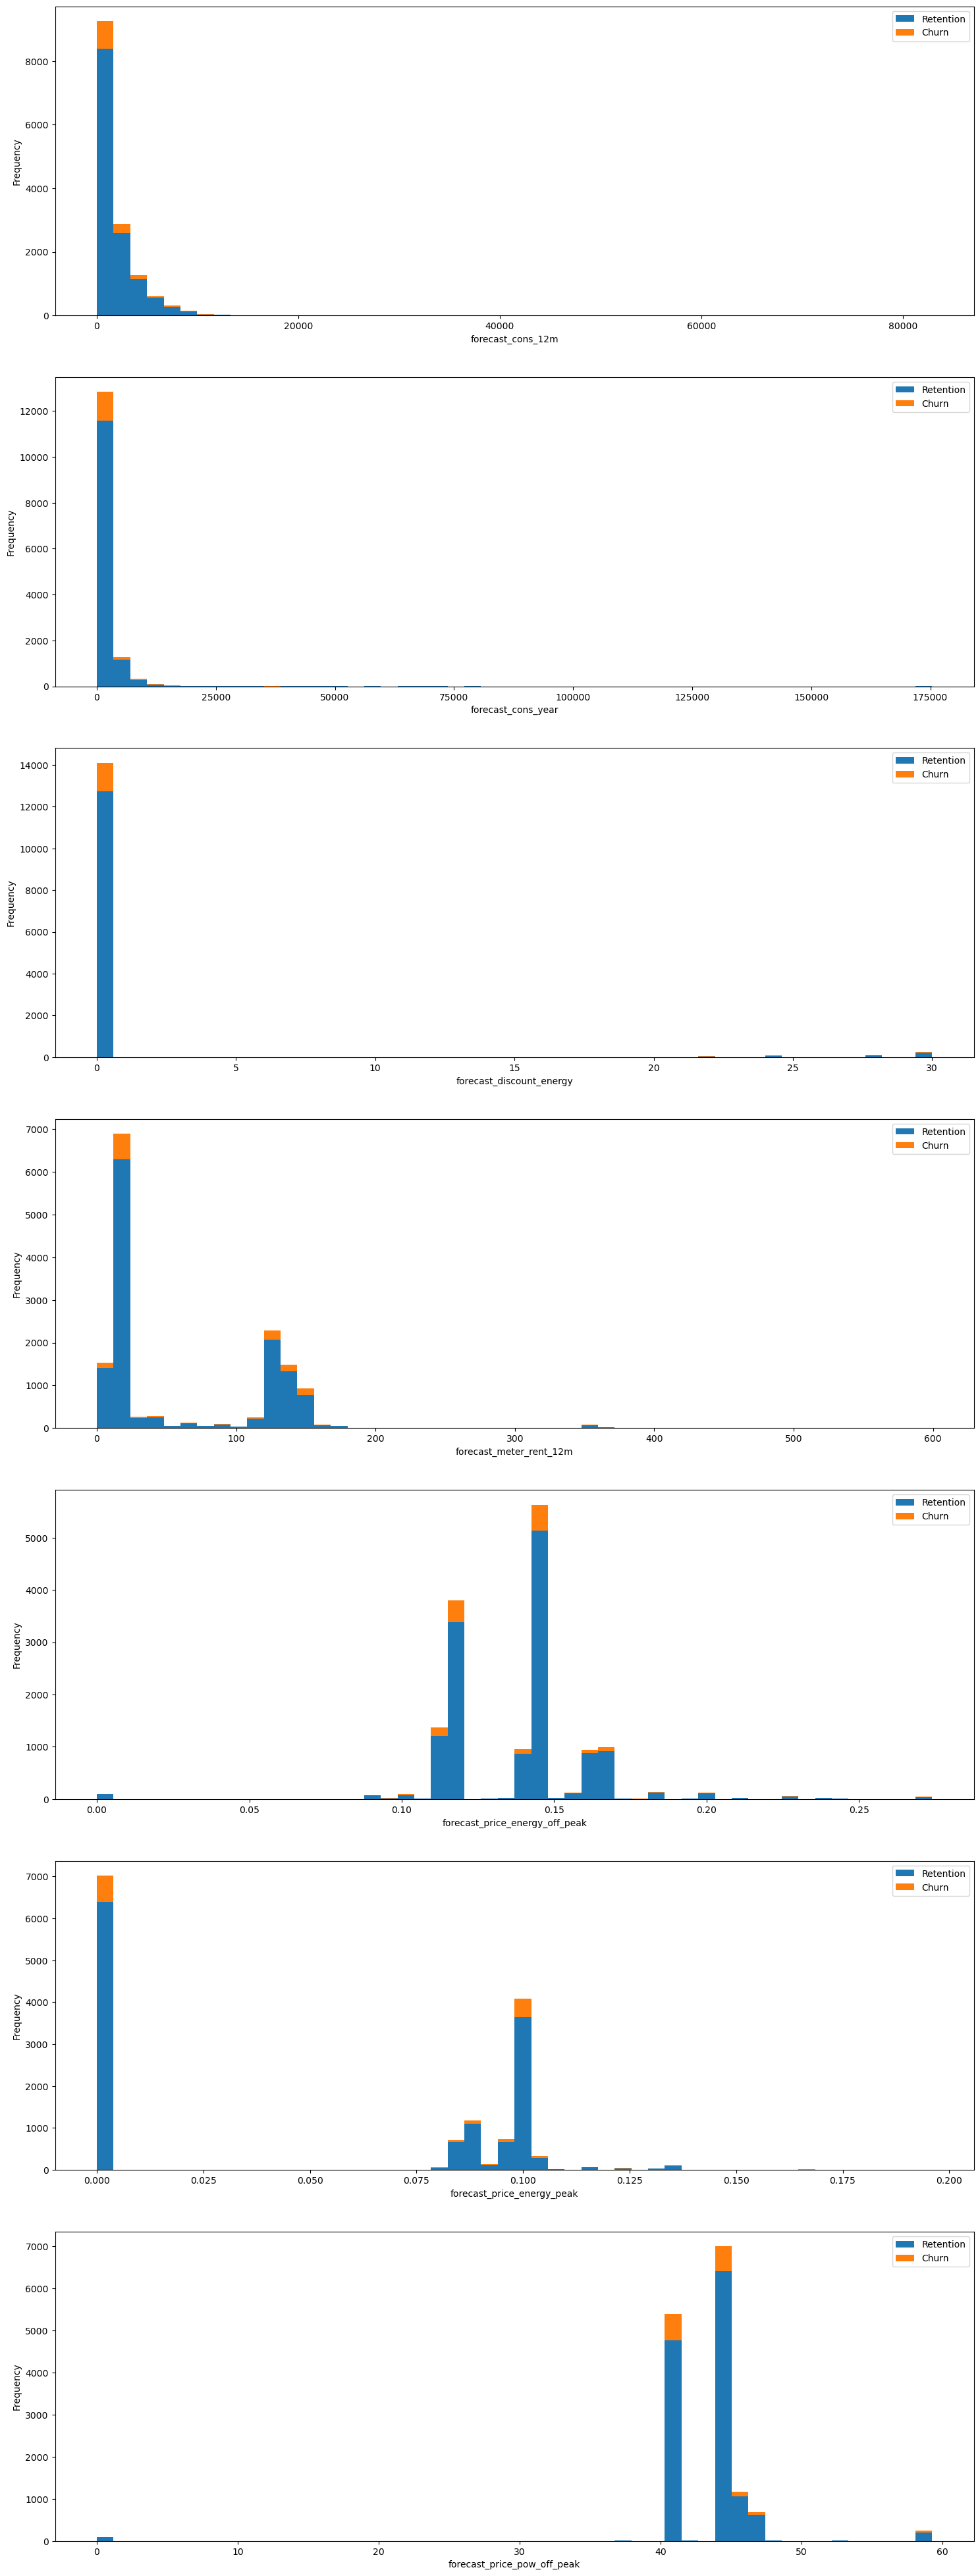

In [187]:
fig,axs=plt.subplots(nrows=7,figsize=(18,50))
plot_distribution(client_df,'forecast_cons_12m',axs[0])
plot_distribution(client_df,'forecast_cons_year',axs[1])
plot_distribution(client_df,'forecast_discount_energy',axs[2])
plot_distribution(client_df,'forecast_meter_rent_12m',axs[3])
plot_distribution(client_df,'forecast_price_energy_off_peak',axs[4])
plot_distribution(client_df,'forecast_price_energy_peak',axs[5])
plot_distribution(client_df,'forecast_price_pow_off_peak',axs[6])

#### Similar to the consumption plots, we can observe forecast plot is also highly positively skewed, we will make some transformation later to correct these skewness

## Contract type

In [196]:
contract_type=client_df[['id','has_gas','churn']]
contract=contract_type.groupby([contract_type['churn'],contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage=(contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

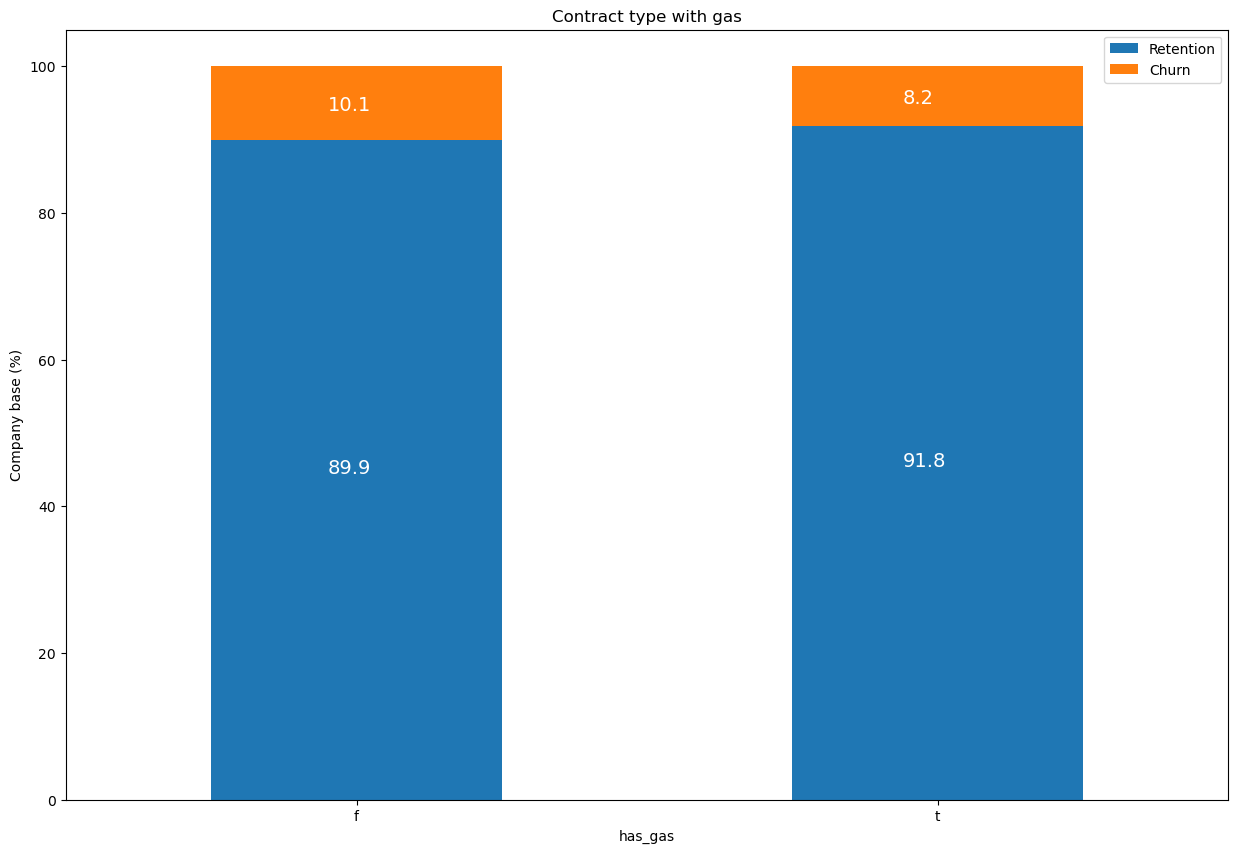

In [197]:
plot_stacked_bars(contract_percentage,'Contract type with gas')

## Margins

In [198]:
margin=client_df[['id','margin_gross_pow_ele','margin_net_pow_ele','net_margin']]
margin.head(2)

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin
0,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99
1,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89


C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sudee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


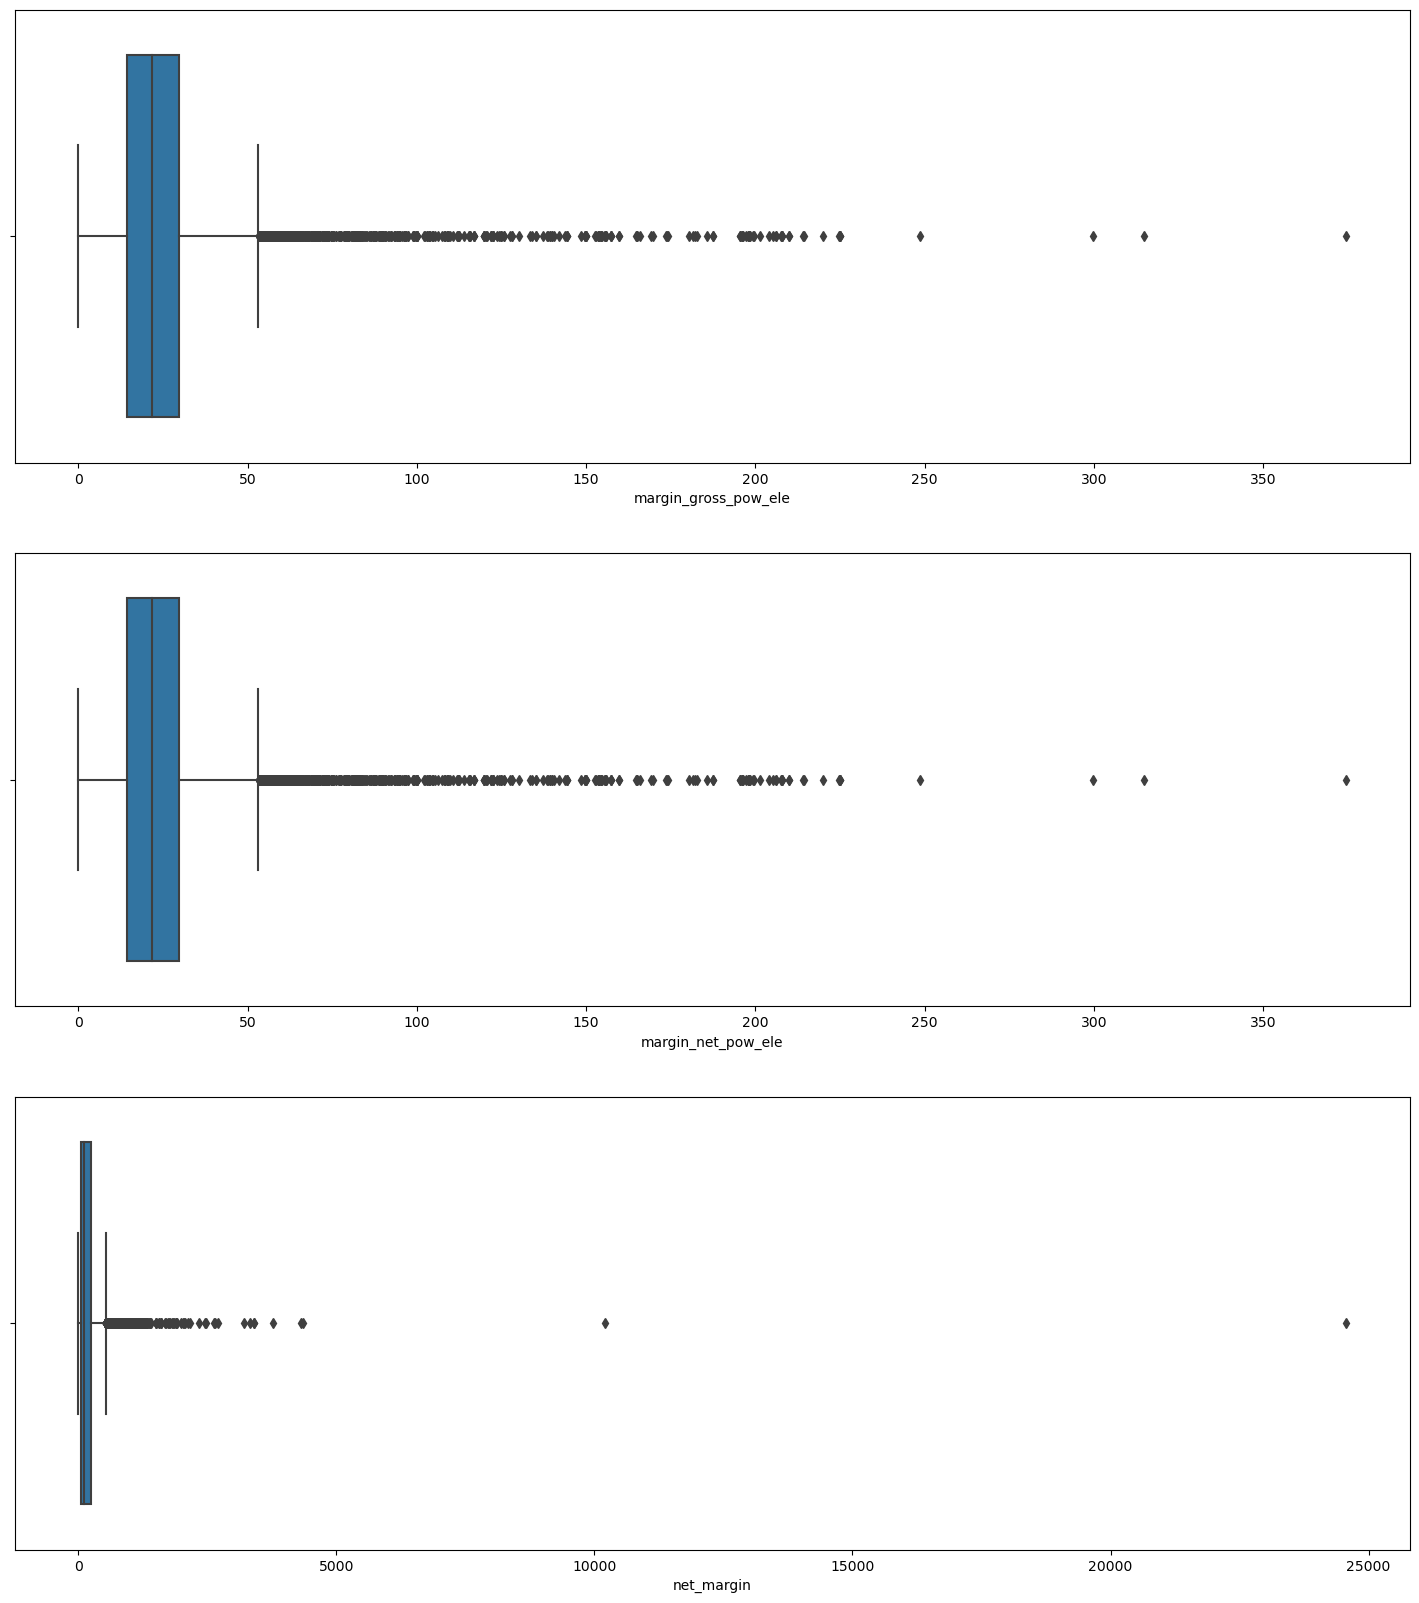

In [201]:
fig, axs=plt.subplots(nrows=3,figsize=(18,20))
sns.boxplot(margin['margin_gross_pow_ele'],ax=axs[0])
sns.boxplot(margin['margin_net_pow_ele'],ax=axs[1])
sns.boxplot(margin['net_margin'],ax=axs[2])

axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

### We have some outliers in Margin as well, we can deal with all the outliers later